# Q3

In [57]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

In [58]:
image = cv2.imread('face.jpg')[:,:,::-1]

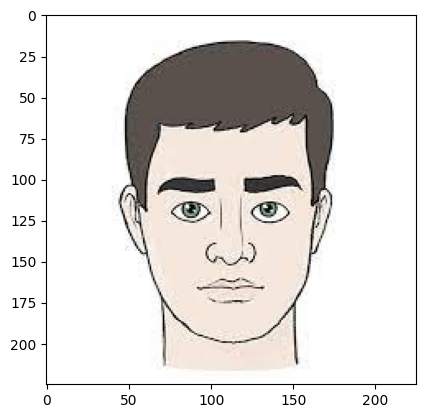

In [59]:
plt.imshow(image)

In [60]:
def segment(image):
    segmented_image = None
    image2 = image.copy()
    seedpoint = (35 , 100)
    queue = []
    visited = [seedpoint]
    queue.append(seedpoint)
    regions = []
    threshold = 20
    mainthreshold = 60
    image = cv2.GaussianBlur(image,(41,41),0)
   
    r, g, b = image[35,100,0] , image[35,100,1] , image[35,100,2]
    image2[35 , 100 , 0 ] = 255
    image2[35 , 100 , 1 ] = 0
    image2[35 , 100, 2 ] = 0
   
    while queue:
 
            s = queue.pop(0)
            print(s, end=" ")
            neighbors = []
            #put all conditions to add 8 neighbors(based on 8 connectivity)
            if(s[0] +1 < image.shape[1]): 
                neighbors.append((s[0] +1 , s[1]))
            if(s[1] +1 < image.shape[0]): 
                 neighbors.append((s[0] , s[1] + 1))
            if(s[0] -1 >= 0): 
                 neighbors.append((s[0]-1 , s[1] ))    
            if(s[1] -1 >= 0 ): 
                 neighbors.append((s[0] , s[1] - 1)) 

            if( s[0] +1 < image.shape[1] and s[1] + 1 <image.shape[0]): 
                 neighbors.append((s[0] + 1 , s[1] +1)) 
            if(s[0] +1 < image.shape[1] and s[1]-1 >= 0): 
                 neighbors.append((s[0] + 1 , s[1] - 1 )) 
            if(s[0] - 1 >= 0 and s[1] -1 >= 0 ): 
                 neighbors.append((s[0] -1 , s[1] - 1)) 
            if( s[0] - 1 >= 0 and s[1] +1 < image.shape[0] ): 
                 neighbors.append((s[0]-1 , s[1] + 1)) 

            
          #calculate differences (the abselute value) and for each channel seperately
            rs , gs , bs = image[s[0] , s[1] , 0] , image[s[0] , s[1] , 1], image[s[0] , s[1] , 2]
            for i in neighbors:
                if i not in visited:
                    r_p = image[i[0] , i[1] , 0]
                    g_p = image[i[0] , i[1] , 1]
                    b_p = image[i[0] , i[1] , 2]
                    dr = abs(r_p - rs)
                    dg = abs(g_p - gs)
                    db = abs(b_p - bs)
                    drm , dgm , dbm = abs(r_p - r) , abs(g_p - g) , abs(b_p - b) 

                    if ((dr <= threshold and dg <= threshold and db <= threshold) and (drm <= mainthreshold and dgm <= mainthreshold
                        and dbm <= mainthreshold)):
                         #draw and point out the pixel in iamge
                         regions.append(i) 
                         image2[i[0] , i[1] , 0 ] = 255
                         image2[i[0] , i[1] , 1 ] = 0
                         image2[i[0] , i[1] , 2 ] = 0
                         queue.append(i)
                         visited.append(i)

    print(image.shape)

    return image2

(35, 100) (36, 100) (35, 101) (34, 100) (35, 99) (36, 101) (36, 99) (34, 99) (34, 101) (37, 100) (37, 101) (37, 99) (35, 102) (36, 102) (34, 102) (33, 100) (33, 99) (33, 101) (35, 98) (36, 98) (34, 98) (37, 102) (37, 98) (33, 98) (33, 102) (38, 100) (38, 101) (38, 99) (38, 102) (38, 98) (35, 103) (36, 103) (34, 103) (37, 103) (33, 103) (32, 100) (32, 99) (32, 101) (32, 98) (32, 102) (35, 97) (34, 97) (36, 97) (37, 97) (33, 97) (38, 103) (38, 97) (32, 97) (32, 103) (39, 100) (39, 101) (39, 99) (39, 102) (39, 98) (39, 103) (39, 97) (35, 104) (36, 104) (34, 104) (37, 104) (33, 104) (38, 104) (32, 104) (31, 100) (31, 99) (31, 101) (31, 98) (31, 102) (31, 97) (31, 103) (35, 96) (34, 96) (33, 96) (36, 96) (37, 96) (38, 96) (32, 96) (39, 104) (39, 96) (31, 96) (31, 104) (40, 100) (40, 101) (40, 99) (40, 102) (40, 98) (40, 103) (40, 97) (40, 104) (40, 96) (35, 105) (36, 105) (34, 105) (37, 105) (33, 105) (38, 105) (32, 105) (39, 105) (31, 105) (30, 100) (30, 99) (30, 101) (30, 98) (30, 102) (3

C:\Users\AsusIran\AppData\Local\Temp\ipykernel_11920\807518026.py:51: RuntimeWarning: overflow encountered in scalar subtract
  dg = abs(g_p - gs)
C:\Users\AsusIran\AppData\Local\Temp\ipykernel_11920\807518026.py:52: RuntimeWarning: overflow encountered in scalar subtract
  db = abs(b_p - bs)
C:\Users\AsusIran\AppData\Local\Temp\ipykernel_11920\807518026.py:50: RuntimeWarning: overflow encountered in scalar subtract
  dr = abs(r_p - rs)


(53, 72) (54, 72) (55, 72) (56, 72) (57, 72) (58, 72) (59, 72) (60, 72) (61, 72) (62, 72) (63, 128) (63, 72) (64, 100) (64, 101) (64, 99) (64, 102) (64, 98) (64, 103) (64, 97) (64, 104) (64, 96) (64, 105) (64, 95) (64, 106) (64, 94) (64, 107) (64, 93) (64, 108) (64, 92) (64, 109) (64, 91) (64, 110) (64, 90) (64, 111) (64, 89) (64, 112) (64, 88) (64, 113) (64, 87) (64, 114) (64, 86) (64, 115) (64, 85) (64, 116) (64, 84) (64, 117) (64, 83) (64, 118) (64, 82) (64, 119) (64, 81) (64, 120) (64, 80) (64, 121) (64, 79) (64, 122) (64, 78) (64, 123) (64, 77) (64, 124) (64, 76) (64, 125) (64, 75) (64, 126) (64, 74) (64, 127) (64, 73) (64, 128) (64, 72) (35, 129) (36, 129) (34, 129) (37, 129) (33, 129) (38, 129) (32, 129) (39, 129) (31, 129) (40, 129) (30, 129) (41, 129) (29, 129) (42, 129) (28, 129) (43, 129) (27, 129) (44, 129) (26, 129) (45, 129) (25, 129) (46, 129) (24, 129) (47, 129) (23, 129) (48, 129) (22, 129) (49, 129) (21, 129) (50, 129) (20, 129) (51, 129) (52, 129) (53, 129) (54, 129)

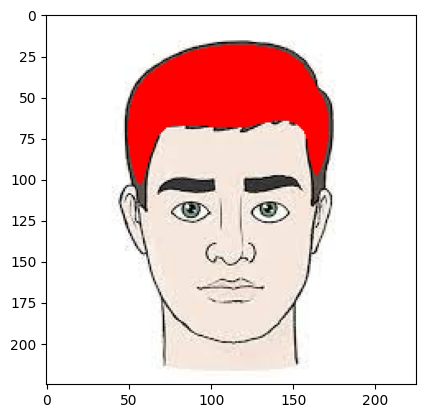

In [61]:
segmented_image = segment(image)
plt.imshow(segmented_image)